In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj][0]

In [17]:
PDMS_0040002_1 = pd.read_csv('Data/PDMS0040002 10N recovery test 1_10242023_182643.csv')
#PDMS_0040002_2 = pd.read_csv('Data/PDMS0040002 10N recovery test 2_10242023_182941.csv')
PDMS_0040002_3 = pd.read_csv('Data/PDMS0040002 10N recovery test 3_10242023_183310.csv')
# put these into a list
data_list = [PDMS_0040002_1, PDMS_0040002_3]
# convert in to um
for df in data_list:
    df['S:LVDT (in)'] = savgol_filter(df['S:LVDT (in)'], 51, 3)
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

C:\Users\wang9\AppData\Local\Temp\ipykernel_20552\2137776120.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]


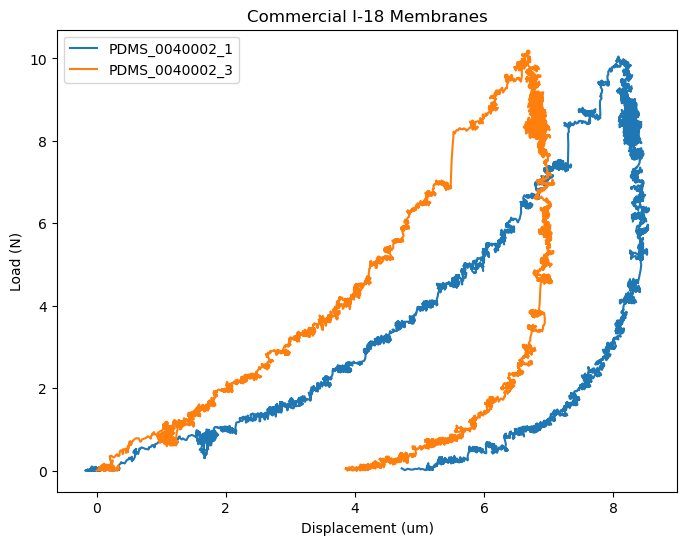

In [18]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 0]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Commercial I-18 Membranes')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()